# Detecting facial landmarks, and body landmarks in videos with mediapipe

## Installing and importing libraries

In [ ]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 16.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import itertools
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# `Part 01`

## Detecting facial landmarks (from the image)

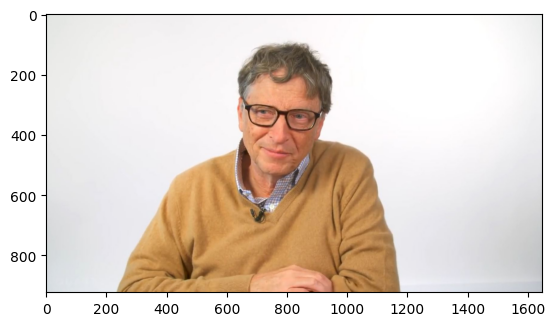

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Internship/06/test_01.JPG')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
face_mesh_results = face_mesh_images.process(rgb_image)
img_h, img_w = image.shape[:2]
print("img_h, img_w ->", img_h, img_w)
print("************************")

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
LEFT_IRIS_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_IRIS)))
print("LEFT_EYE_INDEXES", LEFT_EYE_INDEXES)
print("LEFT_IRIS_INDEXES", LEFT_IRIS_INDEXES)
print("************************")
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
RIGHT_IRIS_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_IRIS)))
print("RIGHT_EYE_INDEXES", RIGHT_EYE_INDEXES)
print("RIGHT_IRIS_INDEXES", RIGHT_IRIS_INDEXES)

img_h, img_w -> 923 1648
************************
LEFT_EYE_INDEXES [384, 385, 386, 387, 388, 390, 263, 362, 398, 466, 373, 374, 249, 380, 381, 382]
LEFT_IRIS_INDEXES [474, 475, 476, 477]
************************
RIGHT_EYE_INDEXES [160, 33, 161, 163, 133, 7, 173, 144, 145, 246, 153, 154, 155, 157, 158, 159]
RIGHT_IRIS_INDEXES [472, 469, 470, 471]


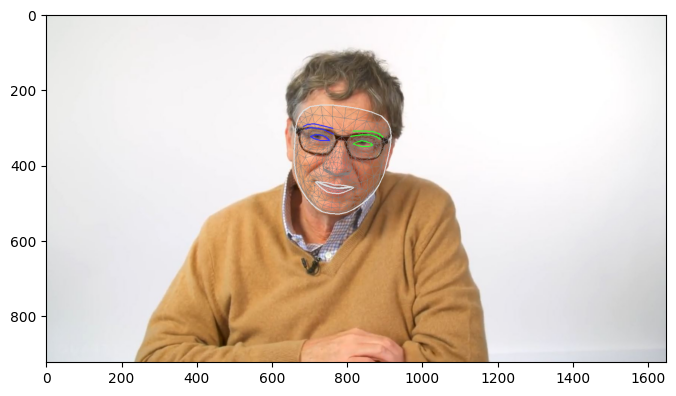

In [ ]:
img_copy = rgb_image.copy()

if face_mesh_results.multi_face_landmarks:
    for face_landmarks in face_mesh_results.multi_face_landmarks: 
      
      # --------------- FACEMESH_IRISES --------------- 
      # mp_drawing.draw_landmarks(image=img_copy, 
      #                           landmark_list= face_landmarks,
      #                           connections= mp_face_mesh.FACEMESH_IRISES,
      #                           landmark_drawing_spec= None, 
      #                           connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
      
      # --------------- FACEMESH_TESSELATION ---------------
      mp_drawing.draw_landmarks(image=img_copy, 
                                landmark_list= face_landmarks,
                                connections= mp_face_mesh.FACEMESH_TESSELATION,
                                landmark_drawing_spec= None, 
                                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
      
      # --------------- FACEMESH_CONTOURS ---------------
      mp_drawing.draw_landmarks(image=img_copy, 
                                landmark_list=face_landmarks,
                                connections=mp_face_mesh.FACEMESH_CONTOURS,
                                landmark_drawing_spec= None, 
                                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

fig = plt.figure(figsize = [8, 8])
plt.imshow(img_copy)
plt.show()

## Detecting facial landmarks (from the video)

In [ ]:
vid_capture = cv2.VideoCapture('/content/drive/MyDrive/Internship/06/Face Landmarks.mp4')

In [ ]:
if (vid_capture.isOpened() == False):
    print("Error opening the video file")
else:
    fps = vid_capture.get(5)
    print('Frames per second : ', fps,'FPS')
    frame_width = int(vid_capture.get(3))
    print('Frames width : ', frame_width)
    frame_height = int(vid_capture.get(4))
    print('Frames height : ', frame_height)
    frame_count = vid_capture.get(7)
    print('Frame count : ', frame_count)


Frames per second :  29.97002997002997 FPS
Frames width :  1280
Frames height :  720
Frame count :  3943.0


In [ ]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh_frames = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, 
                                         min_detection_confidence=0.6, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
output = cv2.VideoWriter('/content/drive/MyDrive/Internship/06/output_face_landmarks.mp4', 
                         cv2.VideoWriter_fourcc(*'XVID'), 
                         fps, 
                         (frame_width,frame_height))

In [ ]:
i = 1
while(vid_capture.isOpened()):
  ret, frame = vid_capture.read()        
  if ret:
    # frame_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_mesh_results = face_mesh_frames.process(frame)
    frame_copy = frame.copy()

    if face_mesh_results.multi_face_landmarks:
      for face_landmarks in face_mesh_results.multi_face_landmarks:
        # --------------- FACEMESH_IRISES --------------- 
        # mp_drawing.draw_landmarks(image = frame_copy, 
        #                           landmark_list = face_landmarks,
        #                           connections = mp_face_mesh.FACEMESH_IRISES,
        #                           landmark_drawing_spec = None, 
        #                           connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_iris_connections_style())

        # --------------- FACEMESH_TESSELATION ---------------
        mp_drawing.draw_landmarks(image = frame_copy, 
                                  landmark_list = face_landmarks,
                                  connections = mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec = None,
                                  connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style())
        
        # --------------- FACEMESH_CONTOURS ---------------
        mp_drawing.draw_landmarks(image = frame_copy, 
                                  landmark_list = face_landmarks,
                                  connections = mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec = None, 
                                  connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_contours_style())
        
    output.write(frame_copy)
    print(i)
    # cv2_imshow(frame_copy)
    i += 1

    key = cv2.waitKey(25)
    if key == ord('q'):
      cv2.destroyAllWindows()
      break
  else:
    break


vid_capture.release()
output.release()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# `Part 02`

## Detecting body landmarks (from the image)

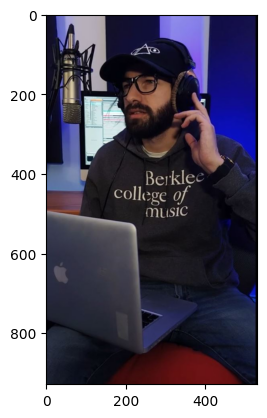

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Internship/06/test_02.JPG')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, static_image_mode = True)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

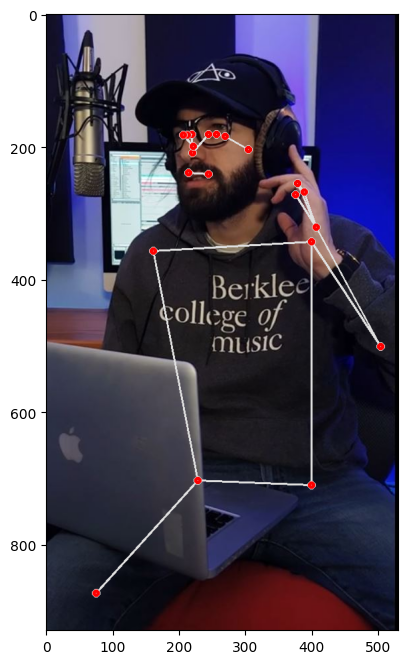

In [ ]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
holistic_results = holistic.process(rgb_image)
img_copy = rgb_image.copy()

if holistic_results.pose_landmarks:      
  img_copy.flags.writeable = True
    
  # --------------- POSE_CONNECTIONS ---------------
  mp_drawing.draw_landmarks(img_copy, 
                            landmark_list = holistic_results.pose_landmarks, 
                            connections = mp_holistic.POSE_CONNECTIONS,
                            landmark_drawing_spec = mp_drawing.DrawingSpec(color=(255,0,0), thickness=3, circle_radius=3))
      

fig = plt.figure(figsize = [8, 8])
plt.imshow(img_copy)
plt.show()

## Detecting body landmarks (from the video)

In [ ]:
vid_capture = cv2.VideoCapture('/content/drive/MyDrive/Internship/06/Body_landmarks.mp4')

In [ ]:
if (vid_capture.isOpened() == False):
    print("Error opening the video file")
else:
    fps = vid_capture.get(5)
    print('Frames per second : ', fps,'FPS')
    frame_width = int(vid_capture.get(3))
    print('Frames width : ', frame_width)
    frame_height = int(vid_capture.get(4))
    print('Frames height : ', frame_height)
    frame_count = vid_capture.get(7)
    print('Frame count : ', frame_count)


Frames per second :  24.0 FPS
Frames width :  406
Frames height :  720
Frame count :  1441.0


In [ ]:
output_body = cv2.VideoWriter('/content/drive/MyDrive/Internship/06/output_body_landmarks.mp4', 
                         cv2.VideoWriter_fourcc(*'XVID'), 
                         fps, 
                         (frame_width,frame_height))

In [ ]:
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7, static_image_mode = False)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
i = 1
while(vid_capture.isOpened()):
  ret, frame = vid_capture.read()        
  if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    holistic_results = holistic.process(frame_rgb)
    frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
    frame_copy = frame_bgr.copy()

    # --------------- POSE_CONNECTIONS ---------------
    mp_drawing.draw_landmarks(frame_copy, 
                              landmark_list = holistic_results.pose_landmarks, 
                              connections = mp_holistic.POSE_CONNECTIONS,
                              landmark_drawing_spec = mp_drawing.DrawingSpec(color=(0,0,255), thickness=3, circle_radius=3))

    output_body.write(frame_copy)
    print(i)
    # cv2_imshow(frame_copy)
    i += 1

    if cv2.waitKey(1) & 0xFF == ord('q'):
      cv2.destroyAllWindows()
      break
  else:
    break


vid_capture.release()
output_body.release()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
